<h1 style='text-aling:center;color:Navy'>  Exploratory Analysis of Auto Insurance Claims  </h1>
<h1 style='text-aling:center;color:Navy'>  CSCI 5580 </h1>
<h1 style='text-aling:center;color:Navy'>  Team: </h1>
<h1 style='text-aling:center;color:Navy'>  Pavan Kumar Kadambala  
<h1 style='text-aling:center;color:Navy'> Nikhitha Desineni
<h1 style='text-aling:center;color:Navy'> Prathibha Anumala  
<h1 style='text-aling:center;color:Navy'> Mamatha Nomula</h1>

***

<hr style="border-top: 5px solid purple; margin-top: 1px; margin-bottom: 1px"></hr>

<hr style="border-top: 5px solid orange; margin-top: 1px; margin-bottom: 1px"></hr>

<div style="font-size:30px;color:#3665af;background-color:#E9E9F5;padding:10px;">1. Importing Libraries and loading the data  </div>


In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.offline as py
%matplotlib inline

# Library for re sampling
from imblearn.over_sampling import SMOTE

# Library for feature scaling
from sklearn.preprocessing import StandardScaler

#libtune to tune model, get different metric score
# Library to tune model and get metric scores
from collections import Counter
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')


In [2]:
ci = pd.read_csv('Car_Insurance_Claim.csv')

In [3]:
ci = ci.rename(columns={'OUTCOME':"CLAIM"})

<hr style="border-top: 5px solid orange; margin-top: 1px; margin-bottom: 1px"></hr>

<div style="font-size:30px;color:#3665af;background-color:#E9E9F5;padding:10px;">2. Data Cleaning </div>

<div style="font-size:20px;color:#F1F8FC;background-color:#0095EA;padding:10px;">2.1 Checking For Null values</div>

In [4]:
ci.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
CLAIM                    0
dtype: int64

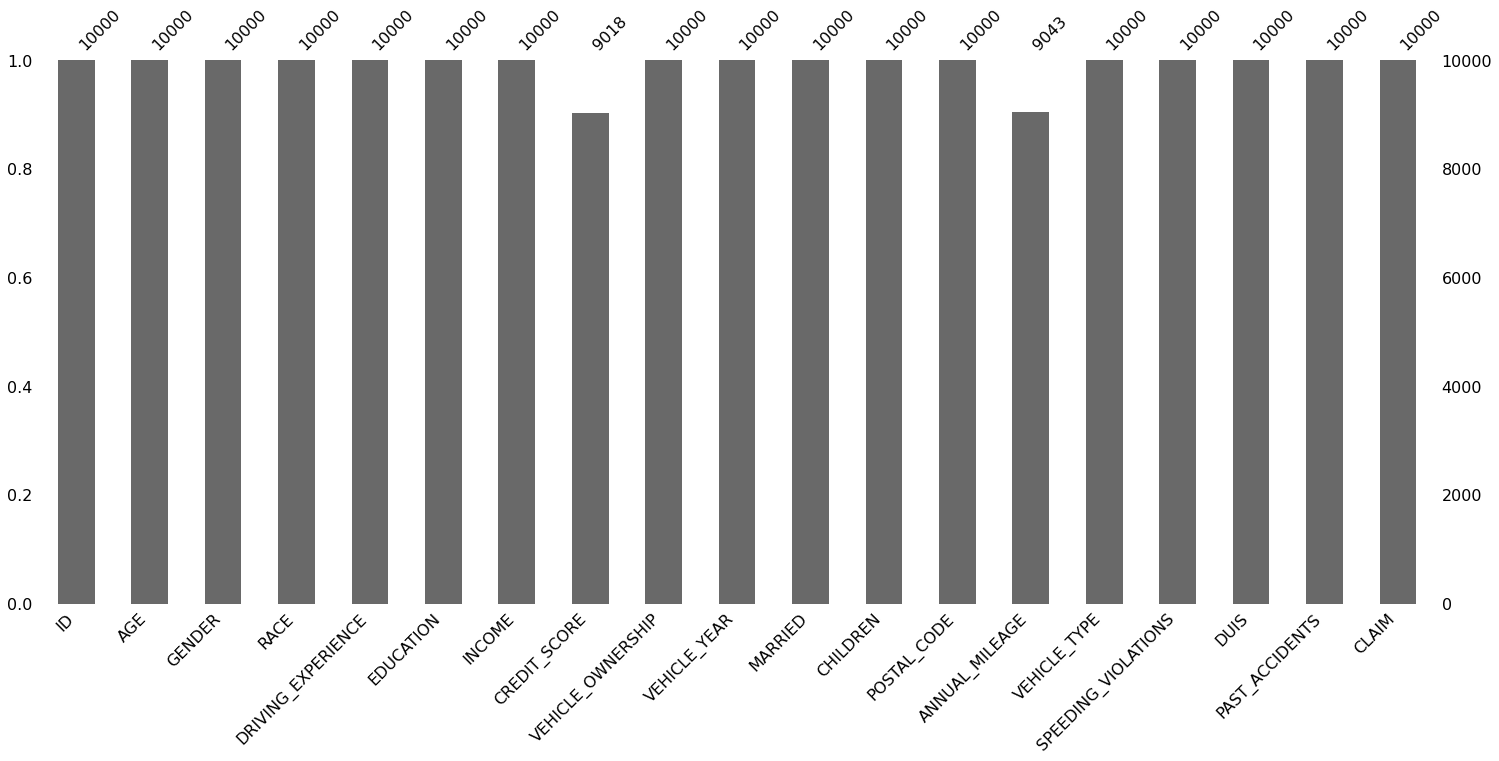

In [5]:
import missingno as msno

msno.bar(ci)
plt.show()

There are 982 missing fields in the CREDIT_SCORE column and 957 missing fields in the ANNUAL_MILEAGE column.

<div style="font-size:20px;color:#F1F8FC;background-color:#0095EA;padding:10px;">2.2 Replacing Null values with Mean and Mode</div>

In [6]:
ci['CREDIT_SCORE'] = ci['CREDIT_SCORE'].fillna(ci['CREDIT_SCORE'].mean())
ci['ANNUAL_MILEAGE'] = ci['ANNUAL_MILEAGE'].fillna(ci['ANNUAL_MILEAGE'].mode()[0])

In [7]:
ci.isna().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
CLAIM                  0
dtype: int64

<div style="font-size:30px;color:#3665af;background-color:#E9E9F5;padding:10px;">3. Data Visualization Using Matplotlib and Seaborn  </div>


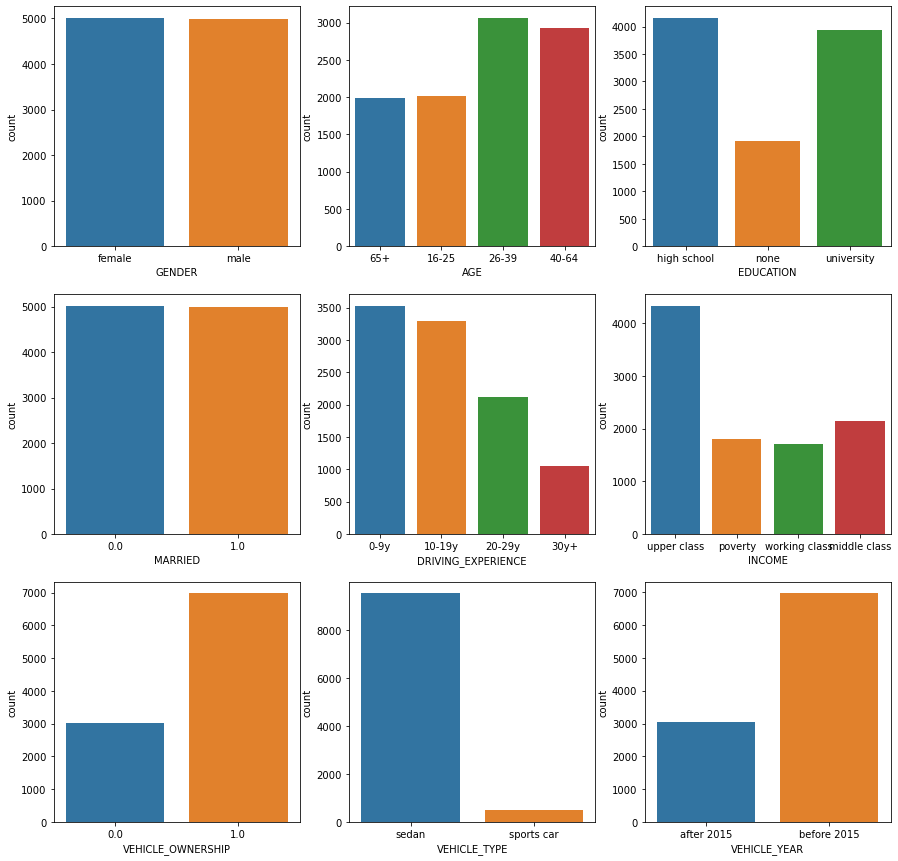

In [8]:
plt.figure(figsize = (15,15))

cnt= ["GENDER","AGE","EDUCATION","MARRIED","DRIVING_EXPERIENCE","INCOME","VEHICLE_OWNERSHIP","VEHICLE_TYPE","VEHICLE_YEAR"]

for i in (range(len(cnt))):
    plt.subplot(3,3,i+1)
    sns.countplot(cnt[i], data = ci)



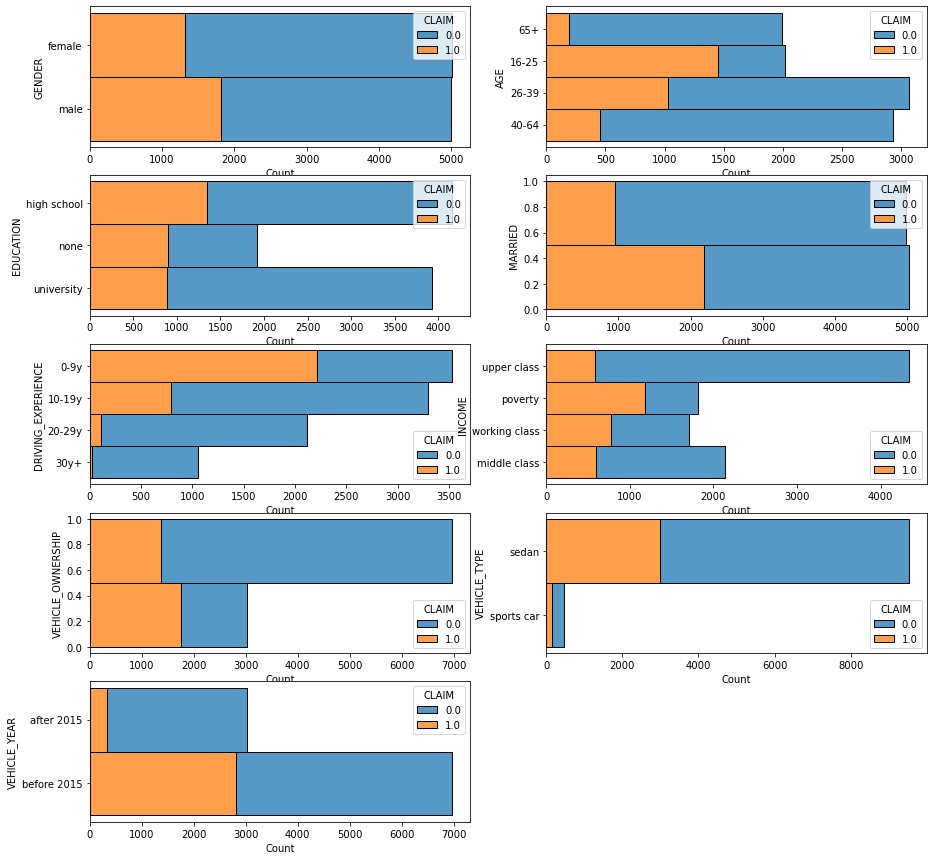

In [9]:
plt.figure(figsize = (15,15))

cnt= ["GENDER","AGE","EDUCATION","MARRIED","DRIVING_EXPERIENCE","INCOME","VEHICLE_OWNERSHIP","VEHICLE_TYPE","VEHICLE_YEAR"]

for i in (range(len(cnt))):
    plt.subplot(5,2,i+1)
    sns.histplot(y=cnt[i], binwidth=0.5, hue="CLAIM", data=ci, stat="count", multiple="stack")



<div style="font-size:30px;color:#3665af;background-color:#e1dfb1;padding:10px;">Plotting the Correlation Matrix </div>

<AxesSubplot:>

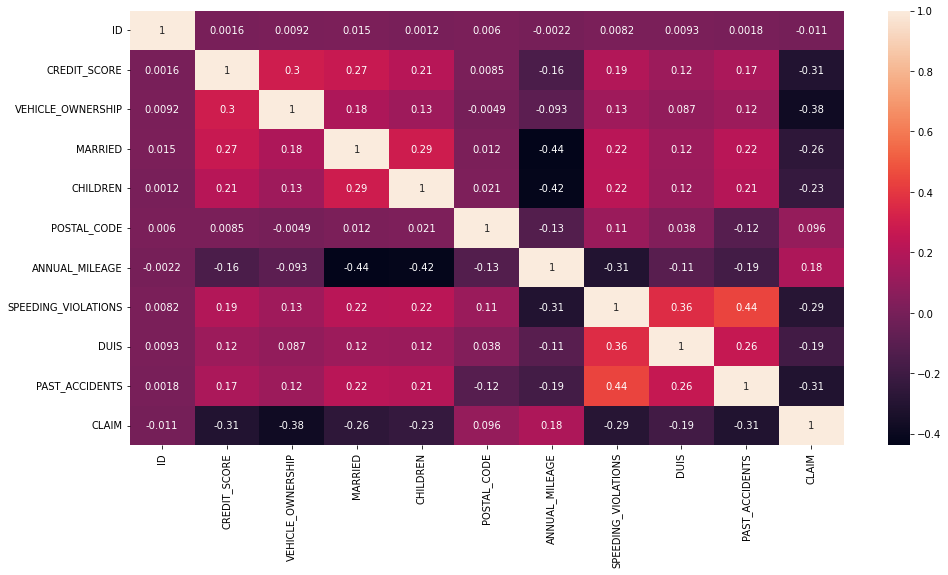

In [10]:
plt.figure(figsize = (16,8))
sns.heatmap(ci.corr(), annot = True)

<div style="font-size:30px;color:#3665af;background-color:#e1dfb1;padding:10px;">Plotting the Correlation with respect to "CLAIM" field </div>

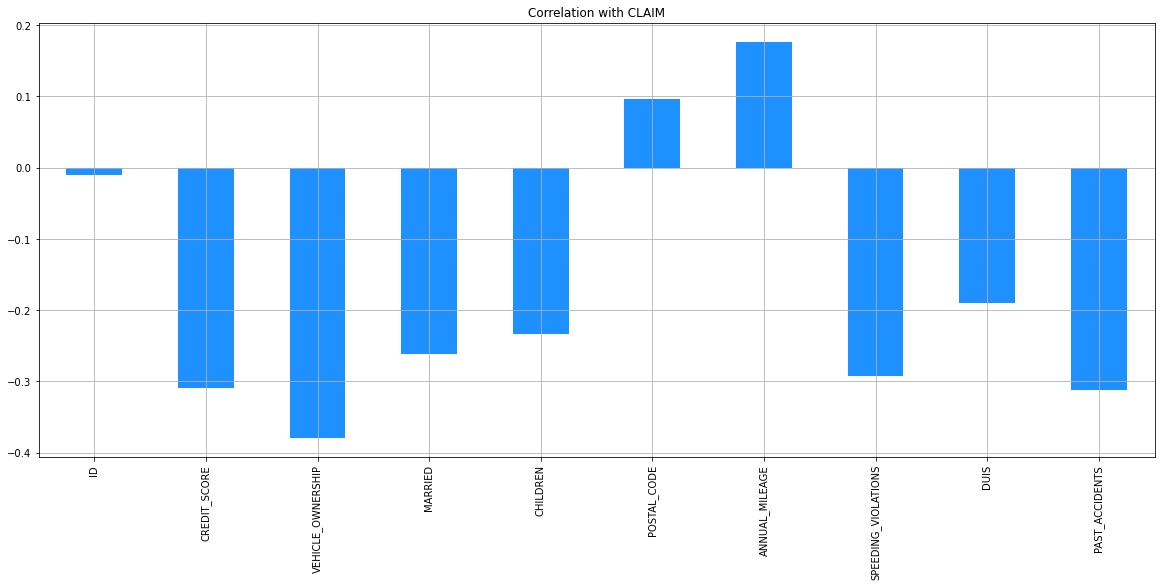

In [11]:
ci.drop('CLAIM', axis=1).corrwith(ci.CLAIM).plot(kind='bar', grid=True,
figsize=(20, 8), title="Correlation with CLAIM",color="#1E90FF");

<div style="font-size:30px;color:#3665af;background-color:#E9E9F5;padding:10px;">4. ML Modeling   </div>


<div style="font-size:20px;color:#F1F8FC;background-color:#0095EA;padding:10px;">4.1 Splitting the data into Training and Testing Sets</div>

In [12]:
X = ci.drop(['CLAIM','ID'],axis=1)
y=ci['CLAIM']
X = pd.get_dummies(X, drop_first=True)  

Splitting the data into training set and testing set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# summarize the class distribution of the training dataset
from collections import Counter
counter = Counter(y_train)
print(counter)

Counter({0.0: 5500, 1.0: 2500})


The data is imbalanced

<div style="font-size:20px;color:#F1F8FC;background-color:#0095EA;padding:10px;">4.2 Sampling</div>

#### Sampling

In [15]:
# transform the training dataset
oversample = SMOTE(random_state=33)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [16]:
# summarize the new class distribution of the training dataset
counter = Counter(y_train)
print(counter)

Counter({0.0: 5500, 1.0: 5500})


 Now the data is balanced.

<div style="font-size:20px;color:#F1F8FC;background-color:#0095EA;padding:10px;">4.3 Feature Scaling</div>

In [17]:
# Creating StandardScaler instance
sc = StandardScaler()

# Fitting Standard Scaller
X_train = sc.fit_transform(X_train)

# Scaling data
X_test = sc.transform(X_test)

<div style="font-size:20px;color:#F1F8FC;background-color:#0095EA;padding:10px;">4.4 HyperParameter Tuning</div>

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
grid_array = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]),  
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]),
               (AdaBoostClassifier(),[{'n_estimators':[100,150,200],'learning_rate':[0.1, 0.5, 0.8, 1],'algorithm':['SAMME', 'SAMME.R'], 'random_state':[0]}]),
               (GradientBoostingClassifier(),[{'n_estimators':[100,150,200],'criterion':['friedman_mse','mse'],'loss':['deviance','exponential'],'learning_rate':[0.1, 0.5, 0.8, 1],'random_state':[0]}]),
               (KNeighborsClassifier(),[{'n_neighbors':[5,7, 8, 10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]),
               (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}])]

In [20]:
for a,b in grid_array:
    grid = GridSearchCV(estimator=a,param_grid = b, scoring = 'accuracy',cv=2)
    grid.fit(X_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(a,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('\n')
    print('*'*125)
    print('\n')

LogisticRegression():
Best Accuracy : 82.11%
Best Parameters :  {'C': 0.25, 'random_state': 0}


*****************************************************************************************************************************


DecisionTreeClassifier():
Best Accuracy : 80.71%
Best Parameters :  {'criterion': 'entropy', 'random_state': 0}


*****************************************************************************************************************************


RandomForestClassifier():
Best Accuracy : 85.16%
Best Parameters :  {'criterion': 'entropy', 'n_estimators': 150, 'random_state': 0}


*****************************************************************************************************************************


AdaBoostClassifier():
Best Accuracy : 83.81%
Best Parameters :  {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 200, 'random_state': 0}


***********************************************************************************************************************

<div style="font-size:20px;color:#F1F8FC;background-color:#0095EA;padding:10px;">4.5 Plotting ROC curve for each of the models</div>

In [21]:
#Fitting Logistic Regression Model
clsdict={'LogisticRegression': LogisticRegression(C= 0.75, random_state= 0),
         'DecisionTreeClassifier': DecisionTreeClassifier(criterion= 'entropy', random_state= 0),
         'RandomForestClassifier': RandomForestClassifier(criterion= 'entropy', n_estimators= 150, random_state= 0),
         'AdaBoostClassifier': AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 0.8, n_estimators= 100, random_state= 0),
         'GradientBoostingClassifier': GradientBoostingClassifier(criterion= 'friedman_mse', learning_rate= 0.1
                                                                  , loss= 'exponential', n_estimators= 100, random_state= 0),
         'KNeighborsClassifier': KNeighborsClassifier(metric= 'manhattan', n_neighbors= 5),
         'SVC': SVC(C= 1, kernel= 'rbf', random_state= 0, probability=True)
        }

              precision    recall  f1-score   support

         0.0       0.90      0.83      0.87      1367
         1.0       0.69      0.80      0.74       633

    accuracy                           0.82      2000
   macro avg       0.79      0.82      0.80      2000
weighted avg       0.83      0.82      0.83      2000

ROC AUC score: 0.8913494685725709
Accuracy Score:  0.8225


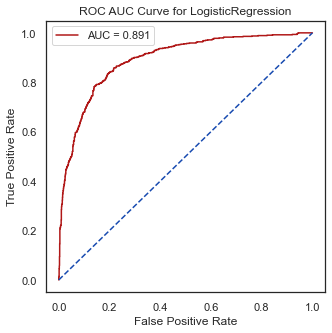

              precision    recall  f1-score   support

         0.0       0.85      0.82      0.84      1367
         1.0       0.64      0.68      0.66       633

    accuracy                           0.78      2000
   macro avg       0.74      0.75      0.75      2000
weighted avg       0.78      0.78      0.78      2000

ROC AUC score: 0.7512951990671562
Accuracy Score:  0.7775


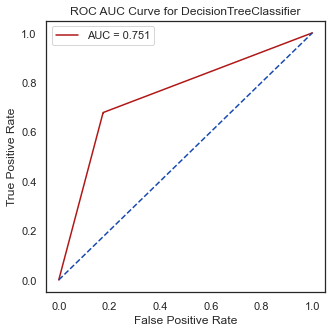

              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87      1367
         1.0       0.72      0.70      0.71       633

    accuracy                           0.82      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.82      0.82      0.82      2000

ROC AUC score: 0.8948435880278883
Accuracy Score:  0.82


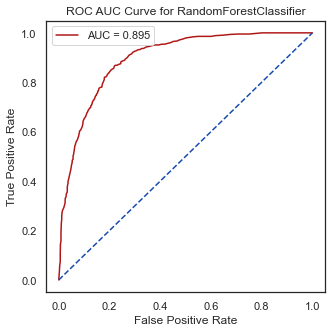

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      1367
         1.0       0.73      0.76      0.74       633

    accuracy                           0.83      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.84      0.83      0.83      2000

ROC AUC score: 0.9053814177792725
Accuracy Score:  0.834


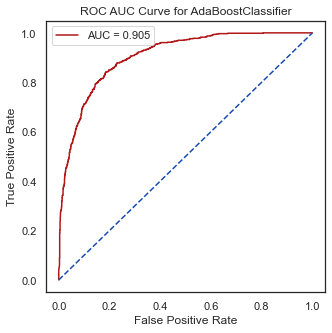

              precision    recall  f1-score   support

         0.0       0.91      0.86      0.88      1367
         1.0       0.73      0.81      0.77       633

    accuracy                           0.84      2000
   macro avg       0.82      0.84      0.83      2000
weighted avg       0.85      0.84      0.85      2000

ROC AUC score: 0.9157014067774478
Accuracy Score:  0.8445


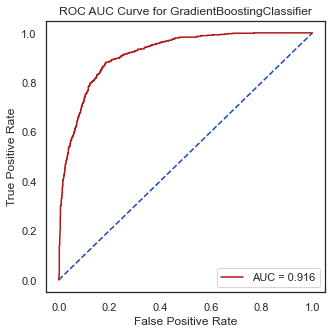

              precision    recall  f1-score   support

         0.0       0.86      0.81      0.84      1367
         1.0       0.64      0.71      0.67       633

    accuracy                           0.78      2000
   macro avg       0.75      0.76      0.75      2000
weighted avg       0.79      0.78      0.78      2000

ROC AUC score: 0.8422312902528686
Accuracy Score:  0.7815


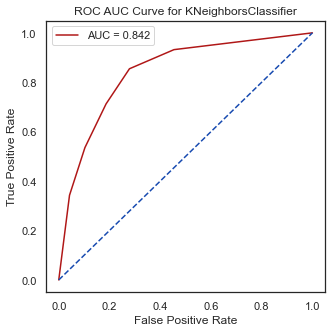

              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87      1367
         1.0       0.69      0.79      0.74       633

    accuracy                           0.82      2000
   macro avg       0.80      0.82      0.80      2000
weighted avg       0.83      0.82      0.83      2000

ROC AUC score: 0.8771314590938981
Accuracy Score:  0.824


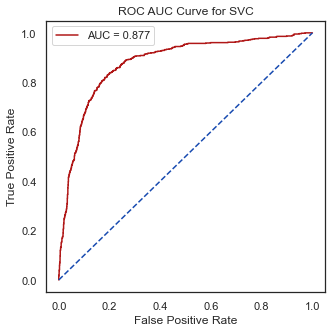

In [22]:
for key,value in clsdict.items():
    accuracies = {}
    classifier = value
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)[:,1]
    cm = confusion_matrix(y_test, y_pred)

    print(classification_report(y_test, y_pred))
    print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    
    # Roc AUC Curve
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    sns.set_theme(style = 'white')
    plt.figure(figsize = (5, 5))
    plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC AUC Curve for'+' '+key)
    plt.legend()
    plt.show()
    

<hr style="border-top: 5px solid purple; margin-top: 1px; margin-bottom: 1px"></hr>

<hr style="border-top: 5px solid orange; margin-top: 1px; margin-bottom: 1px"></hr>